In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ctypes import *

In [ ]:
# %autoreload
# Starting point for generating tones

numtones0 = 5
numtones1 = 5
DACoffset = 0
amp_guessD0 = 100
amp_guessD1 = 100

lincorr0 = 0
lincorr1 = 0

freqcenterD0 = 98
spacingD0 = 4

freqcenterD1 = 98
spacingD1 = 4

###
double = False #BE VERY CAREFUL - CAN QUADRUPLE EXPECTED OUTPUT POWER IF SET TO TRUE.

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

###DANGER - SETTING FREQUENCIES MANUALLY
# freqsD0 = arr([-13.7885+1,0,13.7885-1])+180
# freqsD1 = arr([-13.7885-1,0,13.7885+1])+186
###

phases0 = np.pi*((tone_inds0+1)**2)/(numtones0)
phases1 = np.pi*((tone_inds1+1)**2)/(numtones1)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

init_ampsD0 = np.ones(numtones0)*amp_guessD0 + (np.arange(numtones0)-numtones0/2)*lincorr0
init_ampsD1 = np.ones(numtones1)*amp_guessD1 + (np.arange(numtones1)-numtones1/2)*lincorr1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
err = 50

seq0 = c_float * numtones0
seq1 = c_float * numtones1

# gmoog.zeroAll()

if double:
    amp100_0 = np.ones(numtones0)*80
    amp100_1 = np.ones(numtones1)*80
    
    seq0 = c_float * (2 * numtones0)
    seq1 = c_float * (2 * numtones1)
    freqsetDD0 = np.concatenate((freqsD0,freqsD0))
    freqsetDD1 = np.concatenate((freqsD1,freqsD1))

    ampsetDD0 = np.concatenate((amp100_0, ampD0))
    ampsetDD1 = np.concatenate((amp100_1, ampD1))

    phasesetD0 = np.concatenate((phase_degs0, phase_degs0))
    phasesetD1 = np.concatenate((phase_degs1, phase_degs1))
    # gmoog.setDAC(0+DACoffset, 2*numtones0, seq0(*freqsetDD0), seq0(*ampsetDD0), seq0(*phasesetD0))
    # gmoog.setDAC(1+DACoffset, 2*numtones1, seq1(*freqsetDD1), seq1(*ampsetDD1), seq1(*phasesetD1))
else:
    None;
    # gmoog.setDAC(0+DACoffset, len(freqsD0), seq0(*freqsD0), seq0(*ampD0), seq0(*phase_degs0))
    # gmoog.setDAC(1+DACoffset, len(freqsD1), seq1(*freqsD1), seq1(*ampD1), seq1(*phase_degs1))

# gmoog.endMessage()

# time.sleep(.2)

if double:
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, amp100_0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, amp100_1[ind], freqsD1[ind], phase_degs1[ind])
    
    print()
    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind + np.max(tone_inds0) + 1, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind + np.max(tone_inds1) + 1, ampD1[ind], freqsD1[ind], phase_degs1[ind])
else:    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

In [ ]:
# %autoreload
# Starting point for generating tones

numtones0 = 3
numtones1 = 3
DACoffset = 0
amp_guessD0 = 100
amp_guessD1 = 100

freqcenterD0 = 96
spacingD0 = 9

freqcenterD1 = 96
spacingD1 = 9

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

phases0 = np.pi*((tone_inds0+1)**2)/(numtones0)
phases1 = np.pi*((tone_inds1+1)**2)/(numtones1)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

init_ampsD0 = np.ones(numtones0)*amp_guessD0
init_ampsD1 = np.ones(numtones1)*amp_guessD1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
   
for ind in tone_inds0:
    print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

print()

for ind in tone_inds1:
    print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

# with chirped freq

In [25]:
# %autoreload
# Starting point for generating tones

numtones0 = 9
numtones1 = 9
DACoffset = 0

amp_guessD0 = 38
amp_guessD1 = 38

freqcenterD0 = 98
# spacingD0 = 5.2

freqcenterD1 = 98
# spacingD1 = 5.2

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

# freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
# freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

freqsD0 = 86 + np.cumsum(np.linspace(0.8, 4.0, 9))
freqsD1 = 86 + np.cumsum(np.linspace(0.8, 4.0, 9))

phases0 = np.pi*((tone_inds0+1)**3 - (tone_inds0+1)**2)/(numtones0)
phases1 = np.pi*((tone_inds1+1)**3 - (tone_inds0+1)**2)/(numtones1)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

init_ampsD0 = np.ones(numtones0)*amp_guessD0
init_ampsD1 = np.ones(numtones1)*amp_guessD1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
   
for ind in tone_inds0:
    print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

print()

for ind in tone_inds1:
    print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

set DAC0 0 38.0 86.8 0.0
set DAC0 1 38.0 88.0 80.0
set DAC0 2 38.0 89.6 0.0
set DAC0 3 38.0 91.6 240.0
set DAC0 4 38.0 94.0 200.0
set DAC0 5 38.0 96.8 0.0
set DAC0 6 38.0 100.0 120.0
set DAC0 7 38.0 103.6 320.0
set DAC0 8 38.0 107.6 360.0

set DAC1 0 38.0 86.8 0.0
set DAC1 1 38.0 88.0 80.0
set DAC1 2 38.0 89.6 0.0
set DAC1 3 38.0 91.6 240.0
set DAC1 4 38.0 94.0 200.0
set DAC1 5 38.0 96.8 0.0
set DAC1 6 38.0 100.0 120.0
set DAC1 7 38.0 103.6 320.0
set DAC1 8 38.0 107.6 360.0


In [26]:
freqsD0, phases0

(array([ 86.8,  88. ,  89.6,  91.6,  94. ,  96.8, 100. , 103.6, 107.6]),
 array([  0.        ,   1.3962634 ,   6.28318531,  16.75516082,
         34.90658504,  62.83185307, 102.62536002, 156.38150098,
        226.19467106]))

In [27]:
t_list = np.linspace(0,100e-6,int(100e-6*96e6*100)+1)
int(100e-6*96e6*100)

960000

In [28]:
rf_pulses = []
rf_pulses_naive = []
for idx,_ in enumerate(ampD0):
    rf_pulses.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + phases0[idx]))
    rf_pulses_naive.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + 0))
rf_pulse =  np.array(rf_pulses).sum(axis=0)
rf_pulse_naive =  np.array(rf_pulses_naive).sum(axis=0)

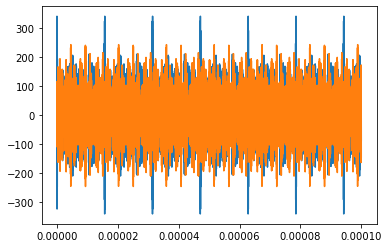

In [29]:
plt.plot(t_list ,rf_pulse_naive)
plt.plot(t_list ,rf_pulse)

In [31]:
from numpy import array as arr
import scipy.optimize as opt

In [32]:
def getExp(val):
    if val == 0:
        return 0
    return np.floor(np.log10(np.abs(val)))

In [33]:
def round_sig(x, sig=3):
    """
    round a float to some number of significant digits
    :param x: the numebr to round
    :param sig: the number of significant digits to use in the rounding
    :return the rounded number, as a float.
    """
    if np.isnan(x):
        x = 0
    try:
        return round(x, sig-int(np.floor(np.log10(abs(x)+2*np.finfo(float).eps)))-1)
    except ValueError:
        print(abs(x))

In [34]:
def round_sig_str(x, sig=3):
    """
    round a float to some number of significant digits
    :param x: the numebr to round
    :param sig: the number of significant digits to use in the rounding
    :return the rounded number, as a string.
    """
    if x is None:
        return "None"
    try:
        if sig<=0:
            return "0"
        if np.isnan(x):
            x = 0
    except TypeError:
        print('Type Error! Type was: ' + str(type(x)))
        return ""

    try:
        res = np.floor(np.log10(abs(x)+2*np.finfo(float).eps))
        if res == np.inf:
            res = 0
        num = round(x, sig-int(res)-1)
        decimals = sig-getExp(num)-1
        if decimals == float('inf'):
            decimals = 3
        if decimals <= 0:
            decimals = 0
        result = ("{0:."+str(int(decimals))+"f}").format(num)
        # make sure result has the correct number of significant digits given the precision.
        return result
    except ValueError:
        print(abs(x))

In [35]:
def maximizeAomPerformance(horFreqs, vertFreqs, numTweezersHor, numTweezersVert, iterations=10, paperGuess=True, metric='max',
                          vertAmps=None, horAmps=None):
    """
    computes the amplitudes and phases to maximize the AOM performance.
    :param horCenterFreq:
    :param vertCenterFreq:
    :param spacing:
    :param numTweezersHor:
    :param numTweezersVert:
    :param iterations:
    :return:
    """
    # horFreqs  = [horCenterFreq - spacing * (numTweezersHor  - 1) / 2.0 + i * spacing for i in range(numTweezersHor )]
    # vertFreqs = [horCenterFreq - spacing * (numTweezersVert - 1) / 2.0 + i * spacing for i in range(numTweezersVert)]
    actualHFreqs = horFreqs
    actualVFreqs = vertFreqs
    
    if vertAmps is None:
        vertAmps = np.ones(numTweezersVert)
    if horAmps is None:
        horAmps = np.ones(numTweezersHor)
    def calcWaveCos(xPts, phases, freqs, amps):
        volts = np.zeros(len(xPts))
        phases += [0]
        for phase, freq, amp in zip(phases, freqs, amps):
            volts += amp * np.cos(2*np.pi*freq * 1e6 * xPts + phase)
        return volts
    def calcWave(xPts, phases, freqs, amps):
        volts = np.zeros(len(xPts))
        phases += [0]
        for phase, freq, amp in zip(phases, freqs, amps):
            volts += amp * np.sin(2*np.pi*freq * 1e6 * xPts + phase)
        return volts
    
    def getXMetric(phases):
        x = np.linspace(0, 3e-6, 20000)
        if metric=='max':
            return max(abs(calcWave(x, phases, actualHFreqs, horAmps)))
        elif metric == 'std':
            return np.std(calcWave(x, phases, actualHFreqs, horAmps))

    def getYMetric(phases):
        x = np.linspace(0, 3e-6, 20000)
        if metric=='max':
            return max(abs(calcWave(x, phases, actualVFreqs, vertAmps)))
        elif metric == 'std':
            return np.std(calcWave(x, phases, actualVFreqs, vertAmps))

    xBounds = [(0, 2 * np.pi) for _ in range(numTweezersHor-1)]
    #
    if paperGuess:
        xGuess = arr([np.pi * i**2/numTweezersHor for i in range(numTweezersHor-1)])
    else:
        xGuess = arr([0 for _ in range(numTweezersHor-1)])
    minimizer_kwargs = dict(method="L-BFGS-B", bounds=xBounds)
    xPhases = opt.basinhopping(getXMetric, xGuess, minimizer_kwargs=minimizer_kwargs, niter=iterations, stepsize=0.2)
    xPhases = list(xPhases.x) + [0]
    print('horFreqs', horFreqs)
    print('horAmps', horAmps)
    print('Hor-Phases-Guess:', [round_sig_str(y,10) for y in xGuess])
    print('Hor-Phases:', [round_sig_str(x,10) for x in xPhases])

    if paperGuess:
        yGuess = arr([np.pi * i**2/numTweezersVert for i in range(numTweezersVert-1)])
    else:
        yGuess = arr([0 for _ in range(numTweezersVert-1)])
    yBounds = [(0, 2 * np.pi) for _ in range(numTweezersVert-1)]
    minimizer_kwargs = dict(method="L-BFGS-B", bounds=yBounds)
    yPhases = opt.basinhopping(getYMetric, yGuess, minimizer_kwargs=minimizer_kwargs, niter=iterations, stepsize=0.2)
    yPhases = list(yPhases.x) + [0]
    for i, xp in enumerate(yPhases):
        yPhases[i] = round_sig(xp, 10)

    print('vertFreqs', vertFreqs)
    print('vertAmps', vertAmps)
    print('Vert-Phases-Guess:', [round_sig_str(y,10) for y in yGuess])
    print('Vert-Phases:', [round_sig_str(y,10) for y in yPhases])

    xpts = np.linspace(0, 1e-6, 10000)
    ypts_x = calcWave(xpts, xPhases, actualHFreqs, horAmps)
    yptsOrig = calcWaveCos(xpts, arr([0 for _ in range(numTweezersHor)]), actualHFreqs, horAmps)
    plt.title('X-Axis')
    plt.plot(xpts, ypts_x, ':', label='X-Optimization')
    plt.plot(xpts, yptsOrig, ':', label='X-Worst-Case')
    plt.legend()

    plt.figure()
    yptsOrig = calcWave(xpts, arr([0 for _ in range(numTweezersVert)]), actualVFreqs, vertAmps)
    ypts_y = calcWaveCos(xpts, yPhases, actualVFreqs, vertAmps)
    plt.title('Y-Axis')
    plt.plot(xpts, ypts_y, ':', label='Y-Optimization')
    plt.plot(xpts, yptsOrig, ':', label='Y-Worst-Case')
    plt.legend()
    return xpts, ypts_x, ypts_y, 

horFreqs [ 86.8  88.   89.6  91.6  94.   96.8 100.  103.6 107.6]
horAmps [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Hor-Phases-Guess: ['0.000000000', '0.3490658504', '1.396263402', '3.141592654', '5.585053606', '8.726646260', '12.56637061', '17.10422667']
Hor-Phases: ['0.05191481064', '1.147977524', '2.952410272', '4.384997570', '5.617898159', '5.504804162', '6.165716260', '6.281649075', '0.000000000']
vertFreqs [ 86.8  88.   89.6  91.6  94.   96.8 100.  103.6 107.6]
vertAmps [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Vert-Phases-Guess: ['0.000000000', '0.3490658504', '1.396263402', '3.141592654', '5.585053606', '8.726646260', '12.56637061', '17.10422667']
Vert-Phases: ['0.1265780031', '1.136172070', '2.976782948', '4.278392168', '5.484123145', '5.326831345', '5.843237336', '5.929044957', '0.000000000']


(array([0.00000000e+00, 1.00010001e-10, 2.00020002e-10, ...,
        9.99799980e-07, 9.99899990e-07, 1.00000000e-06]),
 array([-1.23314909, -0.9426772 , -0.64854462, ..., -1.53200478,
        -1.49159752, -1.44456542]),
 array([4.1227202 , 4.24175512, 4.3439224 , ..., 0.59422051, 0.68758461,
        0.7805978 ]))

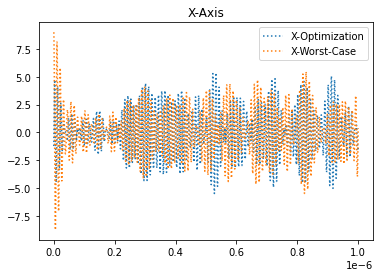

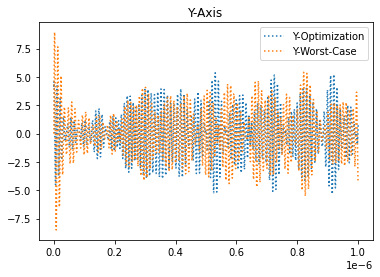

In [33]:
freqsD0 = 86 + np.cumsum(np.linspace(0.8, 4.0, 9))
freqsD1 = 86 + np.cumsum(np.linspace(0.8, 4.0, 9))
maximizeAomPerformance(freqsD0,freqsD1,9,9,50)

In [46]:
opt_phases = ['0.05191481064', '1.147977524', '2.952410272', '4.384997570', '5.617898159', '5.504804162', '6.165716260', '6.281649075', '0.000000000']
# opt_phases = ['0.1265780031', '1.136172070', '2.976782948', '4.278392168', '5.484123145', '5.326831345', '5.843237336', '5.929044957', '0.000000000']
opt_phases = [round(float(o)/np.pi*180) for o in opt_phases]
opt_phases

[3, 66, 169, 251, 322, 315, 353, 360, 0]

In [50]:
print(freqsD0)

[ 86.8  88.   89.6  91.6  94.   96.8 100.  103.6 107.6]


In [47]:
t_list = np.linspace(0,100e-6,int(100e-6*96e6*100)+1)
int(100e-6*96e6*100)

960000

In [48]:
rf_pulses = []
rf_pulses_naive = []
for idx,_ in enumerate(ampD0):
    rf_pulses.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + opt_phases[idx]))
    rf_pulses_naive.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + 0))
rf_pulse =  np.array(rf_pulses).sum(axis=0)
rf_pulse_naive =  np.array(rf_pulses_naive).sum(axis=0)

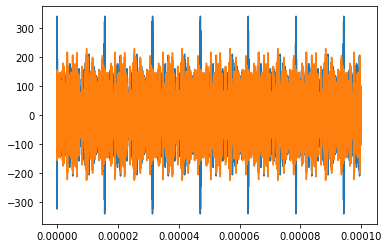

In [49]:
plt.plot(t_list ,rf_pulse_naive)
plt.plot(t_list ,rf_pulse)

horFreqs [ 91.6 103.6]
horAmps [1. 1.]
Hor-Phases-Guess: ['0.000000000']
Hor-Phases: ['1.578650701', '0.000000000']
vertFreqs [ 91.6 103.6]
vertAmps [1. 1.]
Vert-Phases-Guess: ['0.000000000']
Vert-Phases: ['2.023271123', '0.000000000']


(array([0.00000000e+00, 1.00010001e-10, 2.00020002e-10, ...,
        9.99799980e-07, 9.99899990e-07, 1.00000000e-06]),
 array([ 0.99996915,  1.0629156 ,  1.12228131, ..., -1.34506827,
        -1.37113196, -1.39216065]),
 array([ 0.56280738,  0.50967434,  0.45393077, ..., -0.05605089,
         0.00825466,  0.07331445]))

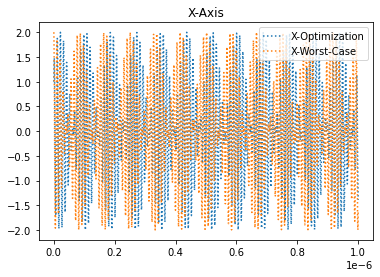

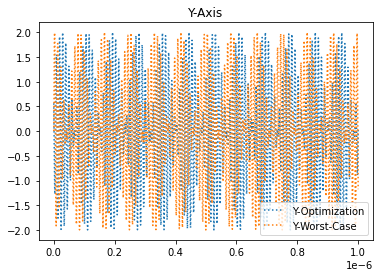

In [47]:
ampD0 = np.array([38,38])
freqsD0 = np.array([91.60, 103.6])
freqsD1 = np.array([91.60, 103.6])
maximizeAomPerformance(freqsD0,freqsD1,2,2,50)

In [48]:
opt_phases = ['0.4183082684', '0.000000000']
# opt_phases = ['0.1265780031', '1.136172070', '2.976782948', '4.278392168', '5.484123145', '5.326831345', '5.843237336', '5.929044957', '0.000000000']
opt_phases = [round(float(o)/np.pi*180) for o in opt_phases]
opt_phases

[24, 0]

In [49]:
print(freqsD0)

[ 91.6 103.6]


In [50]:
t_list = np.linspace(0,100e-6,int(100e-6*96e6*100)+1)
int(100e-6*96e6*100)

960000

In [51]:
rf_pulses = []
rf_pulses_naive = []
for idx,_ in enumerate(ampD0):
    rf_pulses.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + opt_phases[idx]))
    rf_pulses_naive.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + 0))
rf_pulse =  np.array(rf_pulses).sum(axis=0)
rf_pulse_naive =  np.array(rf_pulses_naive).sum(axis=0)

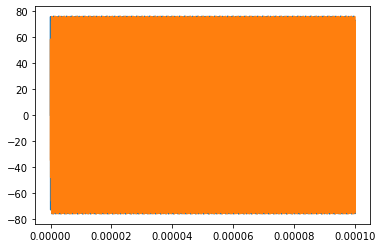

In [52]:
plt.plot(t_list ,rf_pulse_naive)
plt.plot(t_list ,rf_pulse)

# with uneven chirped freq

In [69]:
# %autoreload
# Starting point for generating tones

numtones0 = 5
numtones1 = 5
DACoffset = 0

amp_guessD0 = 100
amp_guessD1 = 100

freqcenterD0 = 98
# spacingD0 = 5.2

freqcenterD1 = 98
# spacingD1 = 5.2

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

# freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
# freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

freqsD0 = np.array([146, 152, 160, 164, 176])/512*307.2
freqsD1 = np.array([146, 152, 160, 164, 176])/512*307.2

_t = freqsD0 / (np.diff(freqsD0).min()/2)
ks = _t - _t.min()
ks

phases0 = np.pi*((ks-1)*(ks-1))/(numtones0)
phases1 = np.pi*((ks-1)*(ks-1))/(numtones0)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

init_ampsD0 = np.ones(numtones0)*amp_guessD0
init_ampsD1 = np.ones(numtones1)*amp_guessD1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
   
for ind,_a,_f,_p in zip(tone_inds0, ampD0, freqsD0, phases0):
    # print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])
    for _ in range(10):
        print(f'set DAC{DACoffset:d} {ind*10+_:d} {_a:.2f} {_f:.2f} {_p:.2f}')
    print()
print('%%%%%%%%%%%%%%%%%%%%%%%%%%')

for ind,_a,_f,_p in zip(tone_inds1, ampD1, freqsD1, phases1):
    for _ in range(10):
        print(f'set DAC{DACoffset+1:d} {ind*10+_:d} {_a:.2f} {_f:.2f} {_p:.2f}')
    print()

set DAC0 0 100.00 87.60 0.63
set DAC0 1 100.00 87.60 0.63
set DAC0 2 100.00 87.60 0.63
set DAC0 3 100.00 87.60 0.63
set DAC0 4 100.00 87.60 0.63
set DAC0 5 100.00 87.60 0.63
set DAC0 6 100.00 87.60 0.63
set DAC0 7 100.00 87.60 0.63
set DAC0 8 100.00 87.60 0.63
set DAC0 9 100.00 87.60 0.63

set DAC0 10 100.00 91.20 2.51
set DAC0 11 100.00 91.20 2.51
set DAC0 12 100.00 91.20 2.51
set DAC0 13 100.00 91.20 2.51
set DAC0 14 100.00 91.20 2.51
set DAC0 15 100.00 91.20 2.51
set DAC0 16 100.00 91.20 2.51
set DAC0 17 100.00 91.20 2.51
set DAC0 18 100.00 91.20 2.51
set DAC0 19 100.00 91.20 2.51

set DAC0 20 100.00 96.00 22.62
set DAC0 21 100.00 96.00 22.62
set DAC0 22 100.00 96.00 22.62
set DAC0 23 100.00 96.00 22.62
set DAC0 24 100.00 96.00 22.62
set DAC0 25 100.00 96.00 22.62
set DAC0 26 100.00 96.00 22.62
set DAC0 27 100.00 96.00 22.62
set DAC0 28 100.00 96.00 22.62
set DAC0 29 100.00 96.00 22.62

set DAC0 30 100.00 98.40 40.21
set DAC0 31 100.00 98.40 40.21
set DAC0 32 100.00 98.40 40.21
set 

In [70]:
freqsD0

array([ 87.6,  91.2,  96. ,  98.4, 105.6])

In [47]:
_t = freqsD0 / (np.diff(freqsD0).min()/2)
ks = _t - _t.min()
ks

array([ 0.,  3.,  7.,  9., 15.])

In [48]:
t_list = np.linspace(0,100e-6,int(100e-6*96e6*100)+1)
int(100e-6*96e6*100)

960000

In [49]:
rf_pulses = []
rf_pulses_naive = []
for idx,_ in enumerate(ampD0):
    rf_pulses.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + phases0[idx]))
    rf_pulses_naive.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + 0))
rf_pulse =  np.array(rf_pulses).sum(axis=0)
rf_pulse_naive =  np.array(rf_pulses_naive).sum(axis=0)

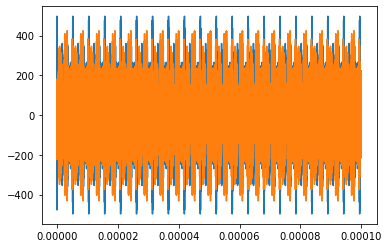

In [50]:
plt.plot(t_list ,rf_pulse_naive)
plt.plot(t_list ,rf_pulse)

In [51]:
from numpy import array as arr
import scipy.optimize as opt

In [52]:
def getExp(val):
    if val == 0:
        return 0
    return np.floor(np.log10(np.abs(val)))

In [53]:
def round_sig(x, sig=3):
    """
    round a float to some number of significant digits
    :param x: the numebr to round
    :param sig: the number of significant digits to use in the rounding
    :return the rounded number, as a float.
    """
    if np.isnan(x):
        x = 0
    try:
        return round(x, sig-int(np.floor(np.log10(abs(x)+2*np.finfo(float).eps)))-1)
    except ValueError:
        print(abs(x))

In [54]:
def round_sig_str(x, sig=3):
    """
    round a float to some number of significant digits
    :param x: the numebr to round
    :param sig: the number of significant digits to use in the rounding
    :return the rounded number, as a string.
    """
    if x is None:
        return "None"
    try:
        if sig<=0:
            return "0"
        if np.isnan(x):
            x = 0
    except TypeError:
        print('Type Error! Type was: ' + str(type(x)))
        return ""

    try:
        res = np.floor(np.log10(abs(x)+2*np.finfo(float).eps))
        if res == np.inf:
            res = 0
        num = round(x, sig-int(res)-1)
        decimals = sig-getExp(num)-1
        if decimals == float('inf'):
            decimals = 3
        if decimals <= 0:
            decimals = 0
        result = ("{0:."+str(int(decimals))+"f}").format(num)
        # make sure result has the correct number of significant digits given the precision.
        return result
    except ValueError:
        print(abs(x))

In [55]:
def maximizeAomPerformance(horFreqs, vertFreqs, numTweezersHor, numTweezersVert, iterations=10, paperGuess=True, metric='max',
                          vertAmps=None, horAmps=None):
    """
    computes the amplitudes and phases to maximize the AOM performance.
    :param horCenterFreq:
    :param vertCenterFreq:
    :param spacing:
    :param numTweezersHor:
    :param numTweezersVert:
    :param iterations:
    :return:
    """
    # horFreqs  = [horCenterFreq - spacing * (numTweezersHor  - 1) / 2.0 + i * spacing for i in range(numTweezersHor )]
    # vertFreqs = [horCenterFreq - spacing * (numTweezersVert - 1) / 2.0 + i * spacing for i in range(numTweezersVert)]
    actualHFreqs = horFreqs
    actualVFreqs = vertFreqs
    
    if vertAmps is None:
        vertAmps = np.ones(numTweezersVert)
    if horAmps is None:
        horAmps = np.ones(numTweezersHor)
    def calcWaveCos(xPts, phases, freqs, amps):
        volts = np.zeros(len(xPts))
        phases += [0]
        for phase, freq, amp in zip(phases, freqs, amps):
            volts += amp * np.cos(2*np.pi*freq * 1e6 * xPts + phase)
        return volts
    def calcWave(xPts, phases, freqs, amps):
        volts = np.zeros(len(xPts))
        phases += [0]
        for phase, freq, amp in zip(phases, freqs, amps):
            volts += amp * np.sin(2*np.pi*freq * 1e6 * xPts + phase)
        return volts
    
    def getXMetric(phases):
        x = np.linspace(0, 3e-6, 20000)
        if metric=='max':
            return max(abs(calcWave(x, phases, actualHFreqs, horAmps)))
        elif metric == 'std':
            return np.std(calcWave(x, phases, actualHFreqs, horAmps))

    def getYMetric(phases):
        x = np.linspace(0, 3e-6, 20000)
        if metric=='max':
            return max(abs(calcWave(x, phases, actualVFreqs, vertAmps)))
        elif metric == 'std':
            return np.std(calcWave(x, phases, actualVFreqs, vertAmps))

    xBounds = [(0, 2 * np.pi) for _ in range(numTweezersHor-1)]
    #
    if paperGuess:
        xGuess = arr([np.pi * i**2/numTweezersHor for i in range(numTweezersHor-1)])
    else:
        xGuess = arr([0 for _ in range(numTweezersHor-1)])
    minimizer_kwargs = dict(method="L-BFGS-B", bounds=xBounds)
    xPhases = opt.basinhopping(getXMetric, xGuess, minimizer_kwargs=minimizer_kwargs, niter=iterations, stepsize=0.2)
    xPhases = list(xPhases.x) + [0]
    print('horFreqs', horFreqs)
    print('horAmps', horAmps)
    print('Hor-Phases-Guess:', [round_sig_str(y,10) for y in xGuess])
    print('Hor-Phases:', [round_sig_str(x,10) for x in xPhases])

    if paperGuess:
        yGuess = arr([np.pi * i**2/numTweezersVert for i in range(numTweezersVert-1)])
    else:
        yGuess = arr([0 for _ in range(numTweezersVert-1)])
    yBounds = [(0, 2 * np.pi) for _ in range(numTweezersVert-1)]
    minimizer_kwargs = dict(method="L-BFGS-B", bounds=yBounds)
    yPhases = opt.basinhopping(getYMetric, yGuess, minimizer_kwargs=minimizer_kwargs, niter=iterations, stepsize=0.2)
    yPhases = list(yPhases.x) + [0]
    for i, xp in enumerate(yPhases):
        yPhases[i] = round_sig(xp, 10)

    print('vertFreqs', vertFreqs)
    print('vertAmps', vertAmps)
    print('Vert-Phases-Guess:', [round_sig_str(y,10) for y in yGuess])
    print('Vert-Phases:', [round_sig_str(y,10) for y in yPhases])

    xpts = np.linspace(0, 1e-6, 10000)
    ypts_x = calcWave(xpts, xPhases, actualHFreqs, horAmps)
    yptsOrig = calcWaveCos(xpts, arr([0 for _ in range(numTweezersHor)]), actualHFreqs, horAmps)
    plt.title('X-Axis')
    plt.plot(xpts, ypts_x, ':', label='X-Optimization')
    plt.plot(xpts, yptsOrig, ':', label='X-Worst-Case')
    plt.legend()

    plt.figure()
    yptsOrig = calcWave(xpts, arr([0 for _ in range(numTweezersVert)]), actualVFreqs, vertAmps)
    ypts_y = calcWaveCos(xpts, yPhases, actualVFreqs, vertAmps)
    plt.title('Y-Axis')
    plt.plot(xpts, ypts_y, ':', label='Y-Optimization')
    plt.plot(xpts, yptsOrig, ':', label='Y-Worst-Case')
    plt.legend()
    return xpts, ypts_x, ypts_y, 

horFreqs [ 87.6  91.2  96.   98.4 105.6]
horAmps [1. 1. 1. 1. 1.]
Hor-Phases-Guess: ['0.000000000', '0.6283185307', '2.513274123', '5.654866776']
Hor-Phases: ['0.1967783738', '1.105269640', '3.292639879', '5.836141977', '0.000000000']
vertFreqs [ 87.6  91.2  96.   98.4 105.6]
vertAmps [1. 1. 1. 1. 1.]
Vert-Phases-Guess: ['0.000000000', '0.6283185307', '2.513274123', '5.654866776']
Vert-Phases: ['0.2099276300', '0.9863525315', '2.994965146', '5.448386162', '0.000000000']


(array([0.00000000e+00, 1.00010001e-10, 2.00020002e-10, ...,
        9.99799980e-07, 9.99899990e-07, 1.00000000e-06]),
 array([0.50632133, 0.64775364, 0.78732511, ..., 0.54988138, 0.33047511,
        0.10994606]),
 array([ 2.21183871,  2.18552249,  2.1511274 , ..., -3.10372469,
        -3.15622712, -3.19722852]))

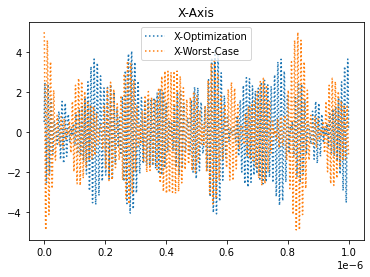

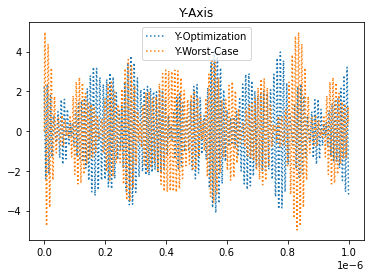

In [56]:
# freqsD0 = 86 + np.cumsum(np.linspace(0.8, 4.0, 9))
# freqsD1 = 86 + np.cumsum(np.linspace(0.8, 4.0, 9))
maximizeAomPerformance(freqsD0,freqsD1,5,5,50)

In [57]:
opt_phases = ['0.1967783738', '1.105269640', '3.292639879', '5.836141977', '0.000000000']
# opt_phases = ['0.1265780031', '1.136172070', '2.976782948', '4.278392168', '5.484123145', '5.326831345', '5.843237336', '5.929044957', '0.000000000']
opt_phases = [round(float(o)/np.pi*180) for o in opt_phases]
opt_phases

[11, 63, 189, 334, 0]

In [58]:
print(freqsD0)

[ 87.6  91.2  96.   98.4 105.6]


In [59]:
t_list = np.linspace(0,100e-6,int(100e-6*96e6*100)+1)
int(100e-6*96e6*100)

960000

In [60]:
rf_pulses = []
rf_pulses_naive = []
for idx,_ in enumerate(ampD0):
    rf_pulses.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + opt_phases[idx]))
    rf_pulses_naive.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + 0))
rf_pulse =  np.array(rf_pulses).sum(axis=0)
rf_pulse_naive =  np.array(rf_pulses_naive).sum(axis=0)

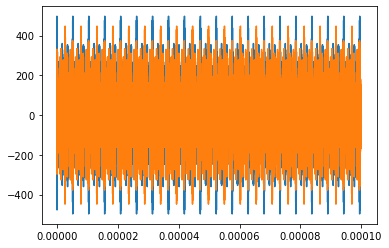

In [61]:
plt.plot(t_list ,rf_pulse_naive)
plt.plot(t_list ,rf_pulse)

# 9x9

In [23]:
# %autoreload
# Starting point for generating tones

numtones0 = 9
numtones1 = 9
DACoffset = 0
amp_guessD0 = 38 * np.sqrt(5/9)
amp_guessD1 = 38 * np.sqrt(5/9)

freqcenterD0 = 98
spacingD0 = 25.2/9 #5.2 * 5 / 9

freqcenterD1 = 98
spacingD1 = 25.2/9 #5.2 * 5 / 9

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

phases0 = np.pi*((tone_inds0+1)**2)/(numtones0)
phases1 = np.pi*((tone_inds1+1)**2)/(numtones1)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

init_ampsD0 = np.ones(numtones0)*amp_guessD0
init_ampsD1 = np.ones(numtones1)*amp_guessD1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
   
for ind in tone_inds0:
    print('set DAC{:d} {:d} {:6.2f} {:6.2f} {:6.2f}'.format(0+DACoffset, ind, ampD0[ind], freqsD0[ind], phase_degs0[ind]))
    # print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

print()

for ind in tone_inds1:
    print('set DAC{:d} {:d} {:6.2f} {:6.2f} {:6.2f}'.format(1+DACoffset, ind, ampD1[ind], freqsD1[ind], phase_degs1[ind]))
    # print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

set DAC0 0  28.32  86.80  20.00
set DAC0 1  28.32  89.60  80.00
set DAC0 2  28.32  92.40 180.00
set DAC0 3  28.32  95.20 320.00
set DAC0 4  28.32  98.00 140.00
set DAC0 5  28.32 100.80   0.00
set DAC0 6  28.32 103.60 260.00
set DAC0 7  28.32 106.40 200.00
set DAC0 8  28.32 109.20 180.00

set DAC1 0  28.32  86.80  20.00
set DAC1 1  28.32  89.60  80.00
set DAC1 2  28.32  92.40 180.00
set DAC1 3  28.32  95.20 320.00
set DAC1 4  28.32  98.00 140.00
set DAC1 5  28.32 100.80   0.00
set DAC1 6  28.32 103.60 260.00
set DAC1 7  28.32 106.40 200.00
set DAC1 8  28.32 109.20 180.00


In [14]:
freqsD0, phases0

(array([ 86.,  89.,  92.,  95.,  98., 101., 104., 107., 110.]),
 array([ 0.34906585,  1.3962634 ,  3.14159265,  5.58505361,  8.72664626,
        12.56637061, 17.10422667, 22.34021443, 28.27433388]))

In [15]:
t_list = np.linspace(0,100e-6,int(100e-6*96e6*100)+1)
int(100e-6*96e6*100)

960000

In [16]:
rf_pulses = []
rf_pulses_naive = []
for idx,_ in enumerate(ampD0):
    rf_pulses.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + phases0[idx]))
    rf_pulses_naive.append(ampD0[idx]*np.sin(freqsD0[idx]*1e6*t_list + 0))
rf_pulse =  np.array(rf_pulses).sum(axis=0)
rf_pulse_naive =  np.array(rf_pulses_naive).sum(axis=0)

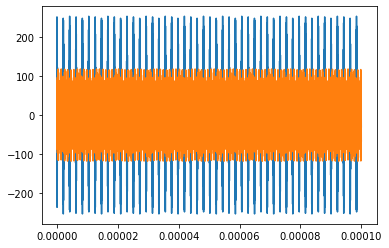

In [17]:
plt.plot(t_list ,rf_pulse_naive)
plt.plot(t_list ,rf_pulse)

In [2]:
%matplotlib inline

###KAUFMAN LAB LIBRARY
klib_version = '1.1'

import sys
sys.path.append('../Analysis_code/klab_python_lib/')

import klib
if klib.__version__ != klib_version:
    raise ValueError('Incorrect klib version number.')

from klib.imports import *
from klib.analysis import *
from klib.plotutil import *

from vimba import *
from IPython import display

%load_ext autoreload
%aimport klib
%autoreload

In [4]:
from ctypes import *
import pythoncom

gmoogLib = cdll.LoadLibrary('C:/Users/KLab/Desktop/AY code space/tweezer_balance/gmoogLib/x64/Release/gmoogLib.dll')

class GM_python(object):
    def __init__(self):
        gmoogLib.gm_new.argtypes = []
        gmoogLib.gm_new.restype = c_void_p
        
        gmoogLib.gm_test.argtypes = [c_void_p]
        gmoogLib.gm_test.restype = c_int
        
        gmoogLib.gm_zeroAll.argtypes = [c_void_p]
        gmoogLib.gm_zeroAll.restype = c_void_p
        
        gmoogLib.gm_endMessage.argtypes = [c_void_p]
        gmoogLib.gm_endMessage.restype = c_void_p
        
        gmoogLib.gm_setDAC.argtypes = [c_void_p, c_int, c_int, POINTER(c_float), POINTER(c_float), POINTER(c_float)]
        gmoogLib.gm_setDAC.restype = c_void_p
        
        self.obj = gmoogLib.gm_new()
    
    def test(self):
        gmoogLib.gm_test(self.obj)
    def zeroAll(self):
        gmoogLib.gm_zeroAll(self.obj)
    def endMessage(self):
        gmoogLib.gm_endMessage(self.obj)
    def setDAC(self, dac, channels, freqs, amps, phases):
        gmoogLib.gm_setDAC(self.obj, dac, channels, freqs, amps, phases)

gmoog = GM_python()

In [5]:
def getImg(camObj, crop_coords = None):
    frame = camObj.get_frame()
    img = frame.as_numpy_ndarray()[:,:,0]
    if crop_coords is not None:
        img = img[crop_coords[0]:crop_coords[1],crop_coords[2]:crop_coords[3]]
    return img

def getROIs(img, bigRoiSettings = [360, 200, 100], roiSettings = [4, 8, 50], bgoff = (165,165)):
    # parse image
    bigRoi = find_rois(img, *bigRoiSettings, bgoff, display = False)[0][0]
    img = img[bigRoi[2]:bigRoi[3],bigRoi[0]:bigRoi[1]]

    rois, bgrois = find_rois(img, *roiSettings, bgoff)
    
    return bigRoi, rois

def getNewAmps(img, ampsetD0, ampsetD1, freqsetD0, freqsetD1, phaseset0, phaseset1, masks, DACoffset = 0, method = 'cross', bgoff = (165,165), ampscale = .01, double = False):
    
    n0 = len(freqsetD0)
    n1 = len(freqsetD1)
    
    ampset100_0 = np.ones(n0)*100
    ampset100_1 = np.ones(n1)*100
    
#     bigRoi = find_rois(img, *bigRoiSettings, bgoff, display = False)[0][0]
#     img = img[crop_coords[0]:crop_coords[1],crop_coords[2]:crop_coords[3]]

#     rois, bgrois = find_rois(img, *roiSettings, bgoff)

#     roisums = np.array(list(map(lambda roi: get_roi_sum(img, roi, bgoff, display=False, bgsub = True),rois)))
    roisums = np.array(list(map(lambda mask: np.sum(mask*img), masks)))

    # roi = rois[0]
    # iimg = img[roi[2]:roi[3],roi[0]:roi[1]]

    # fitdat, params, perr = gaussianBeamFit2D(iimg)
    # plt.imshow(iimg)
    # plt.contour(fitdat)
    # plt.show()

#     Plot ROIS for verification
    
#     plt.plot(roisums, 'ko')
#     # plt.axis([-.1, 11.1, 0, 1.1*max(roisums)])
#     plt.xlabel('spot number')
#     plt.ylabel('brightness')
#     plt.axhline(y=np.mean(roisums))
#     plt.show()

    if DACoffset==0:
        sign = 1 # for dac 0, 1
    elif DACoffset==2:
        sign = -1 # for dac 2, 3
    else:
        raise ValueError('Invalid DAC offset.')
        
    err = (roisums.reshape((n1,n0))[::-sign,:]-roisums.mean())/roisums.mean()*100
    maxerr = np.max(np.abs(err))
    fig=plt.figure()
    plt.imshow(err)
    plt.xlabel("DAC 0")
    plt.ylabel("DAC 1")
    plt.title('Mean val:'+str(np.mean(roisums)))
    cbar = plt.colorbar()
    cbar.set_label('Fractional offset (%)')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    fig.clear()
#     plt.show()
    
    if method == 'cross':
        roisumsD0 = roisums.reshape((n1,n0))[n0//2,::sign]  #DAC0
        roisumsD1 = roisums.reshape((n1,n0))[::-sign,n1//2]  #DAC1    
        
    elif method == 'mean':
        roisumsD0 = np.mean(roisums.reshape((n1,n0))[:, ::sign], axis = 0)  #DAC0
        roisumsD1 = np.mean(roisums.reshape((n1,n0))[::-sign,:], axis = 1)  #DAC1
    
    elif method == 'randomCross':
        roisumsD0 = roisums.reshape((n1,n0))[np.random.randint(n1),::sign]  #DAC0
        roisumsD1 = roisums.reshape((n1,n0))[::-sign,np.random.randint(n0)]  #DAC1    

    else:
        raise ValueError('Invalid method selection: ' + method)
    
    ampoutD0 = ampsetD0 - (roisumsD0-np.mean(roisumsD0))*ampscale
    ampoutD1 = ampsetD1 - (roisumsD1-np.mean(roisumsD1))*ampscale
    
    ampMax = np.max([np.max(ampoutD0), np.max(ampoutD1)])
    if ampMax > 100:
        ampoutD0 = ampoutD0 - (ampMax - 100)
        ampoutD1 = ampoutD1 - (ampMax - 100)
    
    ampMin = np.min([np.min(ampoutD0), np.min(ampoutD1)])
    if ampMin < 0:
        ampoutD0 = ampoutD0 - (ampMin)
        ampoutD1 = ampoutD1 - (ampMin)
    
    #     Send new values to GMoog
        
    gmoog.zeroAll()
    
    if double:
#         amp100_0 = np.ones(n0)*100
#         amp100_1 = np.ones(n1)*100
        ##more conservative, don't start at 100.
        amp100_0 = np.ones(n0)*80
        amp100_1 = np.ones(n1)*80

        seq0 = c_float * (2 * n0)
        seq1 = c_float * (2 * n1)
        
        freqsetDD0 = np.concatenate((freqsetD0,freqsetD0))
        freqsetDD1 = np.concatenate((freqsetD1,freqsetD1))

        ampsetDD0 = np.concatenate((amp100_0, ampsetD0))
        ampsetDD1 = np.concatenate((amp100_1, ampsetD1))

        phasesetD0 = np.concatenate((phaseset0,phaseset0))
        phasesetD1 = np.concatenate((phaseset1,phaseset1))
        gmoog.setDAC(0+DACoffset, 2*n0, seq0(*freqsetDD0), seq0(*ampsetDD0), seq0(*phasesetD0))
        gmoog.setDAC(1+DACoffset, 2*n1, seq1(*freqsetDD1), seq1(*ampsetDD1), seq1(*phasesetD1))
    
    else:
        seq0 = c_float * n0
        seq1 = c_float * n1
        gmoog.setDAC(0+DACoffset, n0, seq0(*freqsetD0), seq0(*ampsetD0), seq0(*phaseset0))
        gmoog.setDAC(1+DACoffset, n1, seq1(*freqsetD1), seq1(*ampsetD1), seq1(*phaseset1))
        
    gmoog.endMessage()
    
    time.sleep(.2)
    
    return ampoutD0, ampoutD1, maxerr

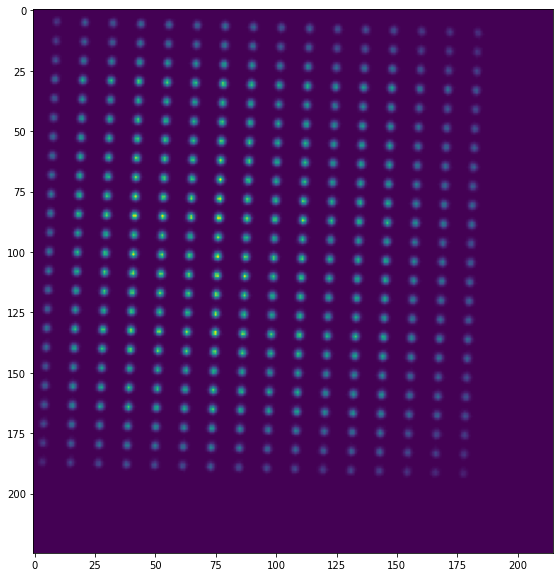

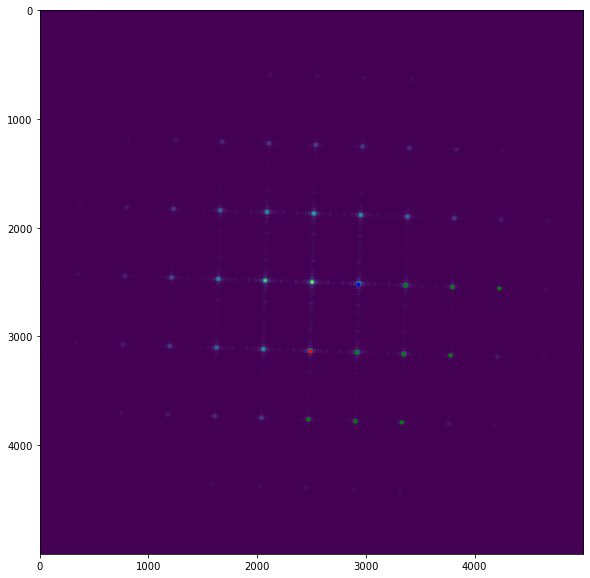

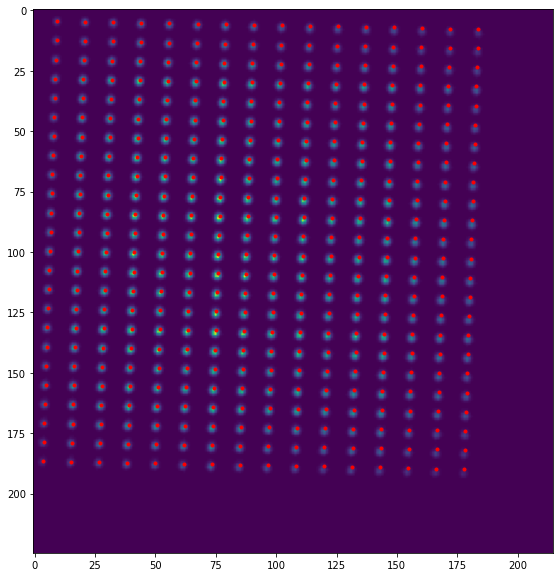

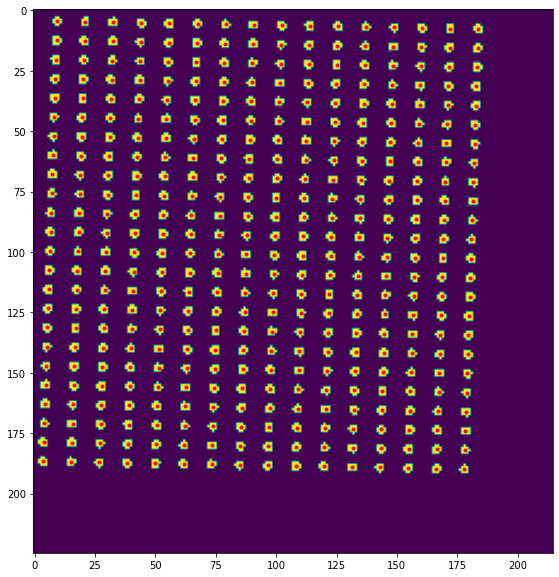

[ 7.91818296 -0.25212142] [ 0.21332664 11.61559407]
set DAC0 0 82.0 131.69700369588722 11.2
set DAC0 1 83.0 137.4707365364356 45.0
set DAC0 2 84.0 143.24446937698397 101.2
set DAC0 3 85.0 149.01820221753235 180.0
set DAC0 4 86.0 154.79193505808072 281.2
set DAC0 5 87.0 160.5656678986291 45.0
set DAC0 6 88.0 166.33940073917748 191.2
set DAC0 7 89.0 172.11313357972585 0.0
set DAC0 8 90.0 177.88686642027423 191.2
set DAC0 9 91.0 183.6605992608226 45.0
set DAC0 10 92.0 189.43433210137098 281.2
set DAC0 11 93.0 195.20806494191936 180.0
set DAC0 12 94.0 200.98179778246774 101.2
set DAC0 13 95.0 206.7555306230161 45.0
set DAC0 14 96.0 212.5292634635645 11.2
set DAC0 15 97.0 218.30299630411287 0.0

set DAC1 0 68.0 129.41350498932786 7.5
set DAC1 1 69.0 133.37754803373414 30.0
set DAC1 2 70.0 137.34159107814042 67.5
set DAC1 3 71.0 141.3056341225467 120.0
set DAC1 4 72.0 145.269677166953 187.5
set DAC1 5 73.0 149.23372021135927 270.0
set DAC1 6 74.0 153.19776325576555 7.5
set DAC1 7 75.0 157.16

In [33]:
%autoreload

plt.rcParams['figure.figsize'] = (10,10)

# Starting point for generating tones

##813

# numtones0 = 16
# numtones1 = 20

# bgoff = (165, 165)

# DACoffset = 2
# amp_guessD0 = 70
# amp_guessD1 = 70

# lincorr0 = 0
# lincorr1 = 0

# freqcenterD0 = 180+3-0.5
# spacingD0 = 5*0.6377
# freqcenterD1 = 190+.2
# spacingD1 = 4*0.6377

##813 NEW 210220

# numtones0 = 3
# numtones1 = 3

# bgoff = (165, 165)

# DACoffset = 2
# amp_guessD0 = 10
# amp_guessD1 = 40

# lincorr0 = 0
# lincorr1 = 0

# latspacing = 5.6575*(30/29+1/128)/3*0.6377

# freqcenterD0 = 180
# freqcenterD1 = 180

# freqcenterD0 = 180+3-0.5
# freqcenterD1 = 190+.2-5*.6377

# spacingD0 = latspacing*11
# spacingD1 = latspacing*11

# ###515

numtones0 = 16
numtones1 = 24
# numtones0 = 8
# numtones1 = 8

bgoff = (165, 165)

DACoffset = 0
amp_guessD0 = 90
amp_guessD1 = 80
# amp_guessD0 = 98
# amp_guessD1 = 98
# amp_guessD0 = 50
# amp_guessD1 = 50

lincorr0 = 1
lincorr1 = 1

# # freqcenterD0 = 180
# # spacingD0 = 60 # 4.5 #10
# # freqcenterD1 = 180
# # spacingD1 = 65 # 4 #16

latspacing = 5.6575*(30/29+1/128)/3

freqcenterD0 = 175
# freqcenterD0 = 183
spacingD0 = latspacing*3*0.97913226
# spacingD0 = latspacing*11*0.97913226 #0.98353589

freqcenterD1 = 175
# freqcenterD1 = 164
spacingD1 = latspacing*2*1.00835695
# spacingD1 = latspacing*11*1.00835695 #1.00558151

###

# offset = 1.3
double = False #BE VERY CAREFUL - CAN QUADRUPLE EXPECTED OUTPUT POWER IF SET TO TRUE.
camID = 2
exposure = 150
# exposure = 5000
# exposure = 2000

#####################
# if len(roisums) > numtones:
#     roisums = roisums[::2]

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

###DANGER - SETTING FREQUENCIES MANUALLY
# freqsD0 = arr([-13.7885+1,0,13.7885-1])+180
# freqsD1 = arr([-13.7885-1,0,13.7885+1])+186
###

phases0 = np.pi*((tone_inds0+1)**2)/(numtones0)
phases1 = np.pi*((tone_inds1+1)**2)/(numtones1)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

ampscale = .001

init_ampsD0 = np.ones(numtones0)*amp_guessD0 + (np.arange(numtones0)-numtones0/2)*lincorr0
init_ampsD1 = np.ones(numtones1)*amp_guessD1 + (np.arange(numtones1)-numtones1/2)*lincorr1

# init_ampsD0[:3]/=2.5
# init_ampsD1[:3]/=2.5

ampD0 = init_ampsD0
ampD1 = init_ampsD1
err = 50

seq0 = c_float * numtones0
seq1 = c_float * numtones1

gmoog.zeroAll()

if double:
    amp100_0 = np.ones(numtones0)*80
    amp100_1 = np.ones(numtones1)*80
    
    seq0 = c_float * (2 * numtones0)
    seq1 = c_float * (2 * numtones1)
    freqsetDD0 = np.concatenate((freqsD0,freqsD0))
    freqsetDD1 = np.concatenate((freqsD1,freqsD1))

    ampsetDD0 = np.concatenate((amp100_0, ampD0))
    ampsetDD1 = np.concatenate((amp100_1, ampD1))

    phasesetD0 = np.concatenate((phase_degs0, phase_degs0))
    phasesetD1 = np.concatenate((phase_degs1, phase_degs1))
    gmoog.setDAC(0+DACoffset, 2*numtones0, seq0(*freqsetDD0), seq0(*ampsetDD0), seq0(*phasesetD0))
    gmoog.setDAC(1+DACoffset, 2*numtones1, seq1(*freqsetDD1), seq1(*ampsetDD1), seq1(*phasesetD1))
else:
    gmoog.setDAC(0+DACoffset, len(freqsD0), seq0(*freqsD0), seq0(*ampD0), seq0(*phase_degs0))
    gmoog.setDAC(1+DACoffset, len(freqsD1), seq1(*freqsD1), seq1(*ampD1), seq1(*phase_degs1))

gmoog.endMessage()

time.sleep(.2)

cam_settings_file = "tweezer_monitor_singleFrame.xml"
# crop_coords = arr([top, bottom, left, right])
# crop_coords = arr([1480,1650,995,1175])
# crop_coords = arr([1360,1650,925,1175])
# crop_coords = arr([1460,1670,985,1195])
# crop_coords = arr([1505,1670,1017,1195])
# crop_coords = arr([1440,1700,975,1300])

# 3x3
# crop_coords = arr([1500,1675,1000,1195])

# 16x16
crop_coords = arr([1450,1675,978,1195])

# 24x16
crop_coords = arr([1450,1675,980,1195])

# 17x1
# crop_coords = arr([1450+85,1450+85+25,958,1295])

# 1x17
# crop_coords = arr([1400,1675,978,1195])

# 15x15 tight
# crop_coords = arr([1538,1670,1048,1195])

# #for 813 big
# crop_coords = arr([1500,1650,985,1115])

with Vimba.get_instance() as vimba:
    cams = vimba.get_all_cameras()
    with cams[camID] as cam:
        cam.load_settings(cam_settings_file, PersistType.All)
        exposure_time = cam.ExposureTime
        exposure_time.set(exposure)
        img = getImg(cam,crop_coords)

# imgc, crop_coords = klib.imagutil.crop(img, sigma = 5, offset = 1, coords = True, pad = 1, plots = True)
# imgc, crop_coords = klib.imagutil.crop(img, sigma = 50, offset = 1, coords = True, pad=3, plots = True)
imgc = img
plt.figure()
plt.imshow(imgc)
plt.show()
# masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 8)*2
# masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 15, FFT = False)*2
masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 2, mode = 'box')
# masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 3)*2
# masks = getMasks(imgc, fftN = 10000, N = [numtones0, numtones1], wmask = 16, mode = 'box')

# masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 3, FFT = False, mode = 'box')
# masks = masks[np.argsort(np.argmax(masks.reshape(17,-1), axis = 1))] # Quick fix for sorting when not using FFT

if double:
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, amp100_0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, amp100_1[ind], freqsD1[ind], phase_degs1[ind])
    
    print()
    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind + np.max(tone_inds0) + 1, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind + np.max(tone_inds1) + 1, ampD1[ind], freqsD1[ind], phase_degs1[ind])

else:    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

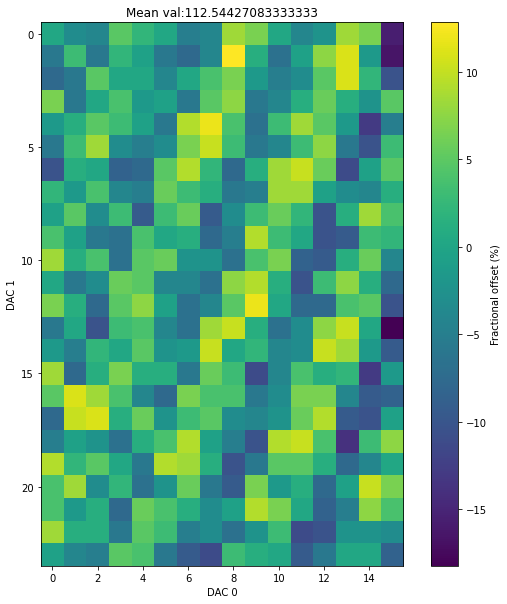

KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [34]:
with Vimba.get_instance() as vimba:
    cams = vimba.get_all_cameras()
    with cams[camID] as cam:
        while err > 10:
            img = getImg(cam, crop_coords)
            ampD0, ampD1, err = getNewAmps(img, ampD0, ampD1, freqsD0, freqsD1, phase_degs0, phase_degs1, masks, method='mean', ampscale = 0.016, DACoffset = DACoffset, double = double)

        print('Switch mode')

        while err > 5:
            img = getImg(cam, crop_coords)
            ampD0, ampD1, err = getNewAmps(img, ampD0, ampD1, freqsD0, freqsD1, phase_degs0, phase_degs1, masks, method='randomCross', ampscale = 0.0065, DACoffset = DACoffset, double = double)

        print('End')

plt.close()

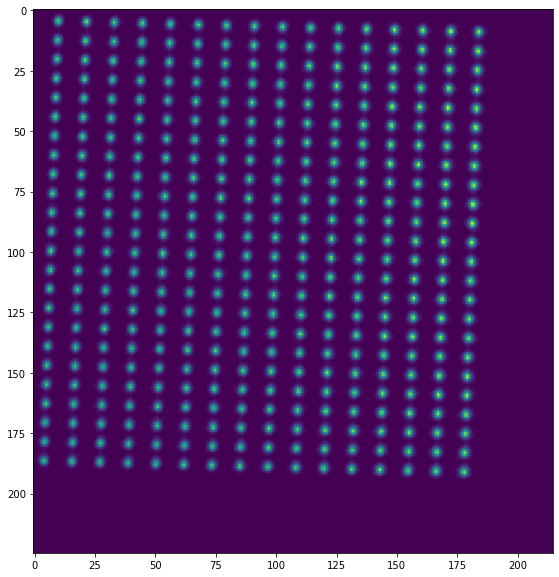

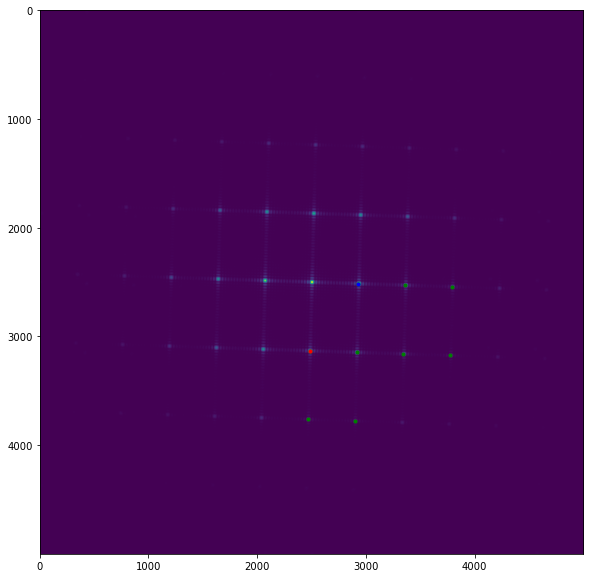

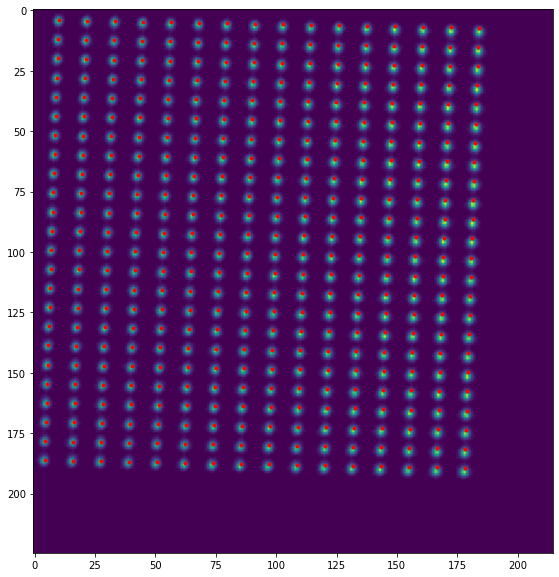

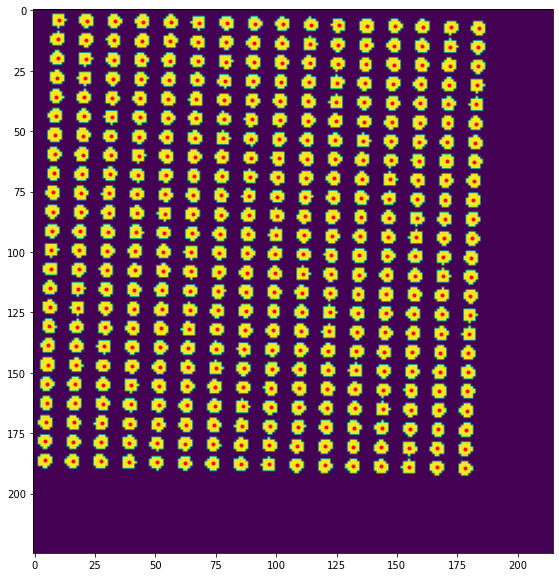

[ 7.91818296 -0.25095407] [ 0.21332664 11.58870061]
Mean val: 167.63802083333334


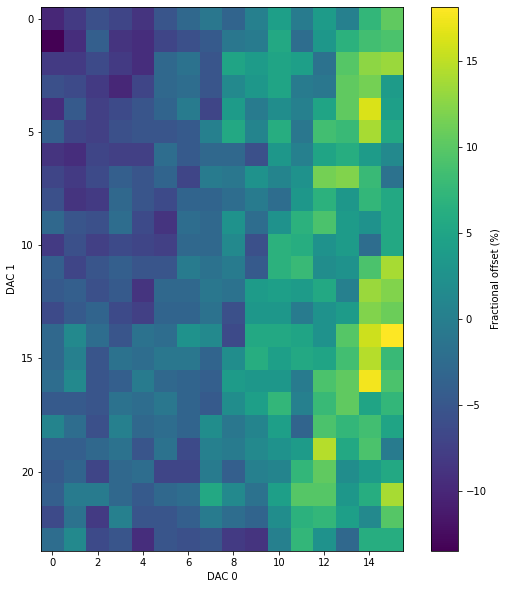

In [35]:
# camID = 2

# exposure = 100
# numtones0 = 16 #2
# numtones1 = 16 # 2

# crop_coords = arr([1440,1670,980,1195])

###

cam_settings_file = "tweezer_monitor_singleFrame.xml"
with Vimba.get_instance() as vimba:
    cams = vimba.get_all_cameras()
    with cams[camID] as cam:
        cam.load_settings(cam_settings_file, PersistType.All)
        exposure_time = cam.ExposureTime
        exposure_time.set(exposure)
        imgc = getImg(cam, crop_coords)
plt.imshow(imgc)
plt.show()

# imgc, crop_coords = klib.imagutil.crop(img, sigma = 3, offset = 1, coords = True, pad=3)
# imgc, crop_coords = klib.imagutil.crop(img, sigma = 25, offset = 1, coords = True, pad=3, plots = True)
# masks = getMasks(img, fftN = 2500, N = [numtones0, numtones1], wmask = 15)*2
# masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 15, FFT = False)*2
masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 3, mode = 'box')
# masks = getMasks(imgc, fftN = 10000, N = [numtones0, numtones1], wmask = 16, mode = 'box')
# masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 1.5)*2

roisums = np.array(list(map(lambda mask: np.sum(mask*imgc), masks)))

print('Mean val:', np.mean(roisums))
plt.imshow((roisums.reshape((numtones1,numtones0))[::-1,:]-roisums.mean())/roisums.mean()*100)
# plt.imshow((roisums.reshape((numtones1,numtones0))[::-1,:])/roisums.max(),vmin=0, vmax = 1)
plt.xlabel("DAC 0")
plt.ylabel("DAC 1")
cbar = plt.colorbar()
cbar.set_label('Fractional offset (%)')
# cbar.set_label('Normalized depth')
plt.show()

In [24]:
tone_inds0_square = tone_inds0
ampD0_square = ampD0
freqsD0_square = freqsD0
phase_degs0_square = phase_degs0
tone_inds1_square = tone_inds1
ampD1_square = ampD1
freqsD1_square = freqsD1
phase_degs1_square = phase_degs1

In [37]:
if DACoffset==0:
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], str(freqsD0[ind]) + '+xoff', phase_degs0[ind])
    print()
    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], str(freqsD1[ind]) + '+yoff', phase_degs1[ind])
        
elif DACoffset == 2:
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], str(freqsD0[ind]) + '+xoff813', phase_degs0[ind])
    print()
    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], str(freqsD1[ind]) + '+yoff813', phase_degs1[ind])

set DAC0 0 74.2293333333333 131.69700369588722+xoff 11.2
set DAC0 1 66.01533333333332 137.4707365364356+xoff 45.0
set DAC0 2 63.5526666666666 143.24446937698397+xoff 101.2
set DAC0 3 60.96733333333335 149.01820221753235+xoff 180.0
set DAC0 4 62.72599999999997 154.79193505808072+xoff 281.2
set DAC0 5 64.54599999999998 160.5656678986291+xoff 45.0
set DAC0 6 63.25866666666663 166.33940073917748+xoff 191.2
set DAC0 7 66.60466666666665 172.11313357972585+xoff 0.0
set DAC0 8 70.93866666666662 177.88686642027423+xoff 191.2
set DAC0 9 72.2066666666666 183.6605992608226+xoff 45.0
set DAC0 10 77.6233333333333 189.43433210137098+xoff 281.2
set DAC0 11 77.99266666666664 195.20806494191936+xoff 180.0
set DAC0 12 81.43466666666663 200.98179778246774+xoff 101.2
set DAC0 13 89.54333333333325 206.7555306230161+xoff 45.0
set DAC0 14 94.54799999999999 212.5292634635645+xoff 11.2
set DAC0 15 100.0 218.30299630411287+xoff 0.0

set DAC1 0 70.21866666666666 129.41350498932786+yoff 7.5
set DAC1 1 63.678666666

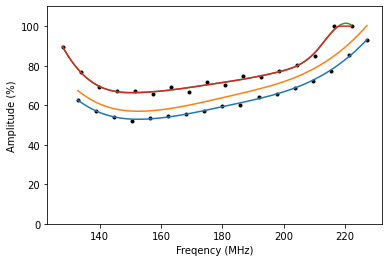

In [3]:
from scipy.interpolate import UnivariateSpline

freqsD0,ampD0 = np.load('ampD0_calibration.npy')
freqsD1,ampD1 = np.load('ampD1_calibration.npy')

interpAmpD0 = UnivariateSpline(freqsD0,ampD0, k = 3, s = 5)
def fAmpD0(freq):
    return interpAmpD0(freq)*100/ampD0[-1]

xs = np.linspace(freqsD0[0],freqsD0[-1],100)

plt.plot(freqsD0,ampD0,'k.')
plt.plot(xs, interpAmpD0(xs))
plt.plot(xs, fAmpD0(xs))
plt.xlabel('Freqency (MHz)')
plt.ylabel('Amplitude (%)')
plt.ylim([0,100])
# plt.show()
# np.save('ampD0_calibration.npy', [freqsD0,ampD0], allow_pickle=True)

interpAmpD1 = UnivariateSpline(freqsD1,ampD1, k = 3, s = 25)
def fAmpD1(freq):
    amp = interpAmpD1(freq)
    return np.where(amp<100,amp, 100)

xs = np.linspace(freqsD1[0],freqsD1[-1],100)

plt.plot(freqsD1,ampD1,'k.')
plt.plot(xs, interpAmpD1(xs))
plt.plot(xs, fAmpD1(xs))
plt.xlabel('Freqency (MHz)')
plt.ylabel('Amplitude (%)')
plt.ylim([0,110])
plt.show()
# np.save('ampD1_calibration.npy', [freqsD1,ampD1], allow_pickle=True)

In [15]:
original_stdout = sys.stdout # Save a reference to the original standard output
sys.stdout = original_stdout # Reset the standard output to its original value

In [16]:
original_stdout = sys.stdout # Save a reference to the original standard output

with open('211101_3x3_rectMoves.gmoogScript', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    
    for ind in tone_inds0_square:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0_square[ind], str(freqsD0_square[ind]) + '+xoff', phase_degs0_square[ind])

    print()

    for ind in tone_inds1_square:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1_square[ind], str(freqsD1_square[ind]) + '+yoff', phase_degs1_square[ind])

    print() 

    for ind in tone_inds0:
        print('setmove', '0', "DAC"+str(0+DACoffset), ind, 0, 0,
              ampD0[ind], 'ampRate' if ampD0[ind]>ampD0_square[ind] else '-ampRate',
              str(freqsD0[ind]) + '+xoff', 'moveRate' if freqsD0[ind]>freqsD0_square[ind] else '-moveRate',
              phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('setmove', '0', "DAC"+str(1+DACoffset), ind, 0, 0,
              ampD1[ind], 'ampRate' if ampD1[ind]>ampD1_square[ind] else '-ampRate',
              str(freqsD1[ind]) + '+yoff', 'moveRate' if freqsD1[ind]>freqsD1_square[ind] else '-moveRate',
              phase_degs1[ind])
    print()
    
    sys.stdout = original_stdout # Reset the standard output to its original value

In [14]:
(roisums.reshape((numtones1,numtones0))[::-1,:])/roisums.max()

array([[0.8913738 , 0.88498403, 0.87699681, 0.86900958, 0.86421725,
        0.88338658, 0.89297125, 0.88977636, 0.84185304, 0.81789137,
        0.90095847, 0.89616613, 0.93610224, 0.9313099 , 0.83865815,
        0.80990415],
       [0.9201278 , 0.87060703, 0.88658147, 0.83865815, 0.86900958,
        0.92492013, 0.92651757, 0.93769968, 0.91853035, 0.88178914,
        0.85463259, 0.8514377 , 0.9057508 , 0.92971246, 0.87539936,
        0.86421725],
       [0.90894569, 0.87699681, 0.89936102, 0.87539936, 0.85942492,
        0.88817891, 0.89297125, 0.92651757, 0.91533546, 0.91533546,
        0.87060703, 0.82907348, 0.8370607 , 0.89936102, 0.9057508 ,
        0.88338658],
       [0.92332268, 0.86421725, 0.88658147, 0.86900958, 0.94089457,
        0.88019169, 0.89456869, 0.92172524, 0.84984026, 0.89936102,
        0.89936102, 0.84185304, 0.85942492, 0.83067093, 0.88178914,
        0.88178914],
       [0.89616613, 0.87699681, 0.86421725, 0.88817891, 0.90894569,
        0.91373802, 0.91054313, 

In [11]:
# freqsD0 = freqsD0 + spacingD0/5
# freqsD1 = freqsD1 + spacingD1/5

if double:
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, amp100_0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, amp100_1[ind], freqsD1[ind], phase_degs1[ind])
    
    print()
    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind + np.max(tone_inds0) + 1, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind + np.max(tone_inds1) + 1, ampD1[ind], freqsD1[ind], phase_degs1[ind])

else:    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

set DAC0 0 67.45303124999997 135.77410930765086 11.2
set DAC0 1 63.41653124999997 141.67089473329742 45.0
set DAC0 2 60.30703124999999 147.56768015894397 101.2
set DAC0 3 61.80253125000001 153.46446558459053 180.0
set DAC0 4 61.503531250000016 159.36125101023708 281.2
set DAC0 5 61.65403125000001 165.25803643588364 45.0
set DAC0 6 63.79703125000004 171.1548218615302 191.2
set DAC0 7 65.20053125000003 177.05160728717675 0.0
set DAC0 8 67.72353125000005 182.9483927128233 191.2
set DAC0 9 70.58053124999998 188.84517813846986 45.0
set DAC0 10 71.56303124999995 194.74196356411642 281.2
set DAC0 11 73.10353124999997 200.63874898976297 180.0
set DAC0 12 77.66953125 206.53553441540953 101.2
set DAC0 13 82.77003124999997 212.43231984105608 45.0
set DAC0 14 89.32553125000003 218.32910526670264 11.2
set DAC0 15 99.82153124999999 224.2258906923492 0.0

set DAC1 0 85.63246874999996 130.77410930765086 11.2
set DAC1 1 80.21596875000002 136.67089473329742 45.0
set DAC1 2 74.03096875000003 142.56768015

In [21]:
10*np.log10((/.8)**2)

1.4926723659380823

In [ ]:
#
# code for balancing at 813

#
#

%autoreload

plt.rcParams['figure.figsize'] = (10,10)

# Starting point for generating tones

numtones0 = 16
numtones1 = 20

bgoff = (165, 165)

DACoffset = 2
amp_guessD0 = 70
amp_guessD1 = 70

lincorr0 = 0
lincorr1 = 0

freqcenterD0 = 180
spacingD0 = 5.1*0.6377
freqcenterD1 = 190
spacingD1 = 4.2*0.6377

# freqcenterD0 = 185+4*3-11 - 8.4
# spacingD0 = 4
# freqcenterD1 = 185+4.5*3-2*3.25 + 4.5 - 7
# spacingD1 = 4.5

# freqcenterD0 = 180.2888
# spacingD0 = 3.1888
# freqcenterD1 = 189.6888
# spacingD1 = 3.5077

# DACoffset = 0 # 0: 515 rail, 2: 813 rail

# freqcenterD0 = 180
# spacingD0 = 4.6
# freqcenterD1 = 180
# spacingD1 = 4.6

# amp_guessD0 = 90
# amp_guessD1 = 90

# offset = 1.3
double = False #BE VERY CAREFUL - CAN QUADRUPLE EXPECTED OUTPUT POWER IF SET TO TRUE.
cam = 0
exposure = 50


#####################
# if len(roisums) > numtones:
#     roisums = roisums[::2]

tone_inds0 = np.arange(numtones0)
tone_inds1 = np.arange(numtones1)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones0-1)/2, freqcenterD0+spacingD0*numtones0/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones1-1)/2, freqcenterD1+spacingD1*numtones1/2, spacingD1)

phases0 = np.pi*((tone_inds0+1)**2)/(numtones0)
phases1 = np.pi*((tone_inds1+1)**2)/(numtones1)

phase_degs0 = np.round(phases0*180/np.pi%360, 1)
phase_degs1 = np.round(phases1*180/np.pi%360, 1)

ampscale = .001

init_ampsD0 = np.ones(numtones0)*amp_guessD0 + (np.arange(numtones0)-numtones0/2)*lincorr0
init_ampsD1 = np.ones(numtones1)*amp_guessD1 + (np.arange(numtones1)-numtones1/2)*lincorr1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
err = 75

seq0 = c_float * numtones0
seq1 = c_float * numtones1

gmoog.zeroAll()

if double:
    amp100 = np.ones(numtones)*100
    seq = c_float * (2 * numtones)
    freqsetDD0 = np.concatenate((freqsD0,freqsD0))
    freqsetDD1 = np.concatenate((freqsD1,freqsD1))

    ampsetDD0 = np.concatenate((amp100, ampD0))
    ampsetDD1 = np.concatenate((amp100, ampD1))

    phasesetD0 = np.concatenate((phase_degs0, phase_degs0))
    phasesetD1 = np.concatenate((phase_degs1, phase_degs1))
    gmoog.setDAC(0+DACoffset, 2*numtones, seq(*freqsetDD0), seq(*ampsetDD0), seq(*phasesetD0))
    gmoog.setDAC(1+DACoffset, 2*numtones, seq(*freqsetDD1), seq(*ampsetDD1), seq(*phasesetD1))
else:
    gmoog.setDAC(0+DACoffset, len(freqsD0), seq0(*freqsD0), seq0(*ampD0), seq0(*phase_degs0))
    gmoog.setDAC(1+DACoffset, len(freqsD1), seq1(*freqsD1), seq1(*ampD1), seq1(*phase_degs1))

gmoog.endMessage()

time.sleep(.2)

capture_image(cameraID = cam, exposure = exposure)
img = np.loadtxt('tmp_img.txt', dtype=int);
imgc, crop_coords = klib.imagutil.crop(img, sigma = 2, offset = 10, coords = True, pad = 2, plots = True)
masks = getMasks(imgc, fftN = 5000, N = [numtones0, numtones1], wmask = 16)*2

if double:
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, amp100[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, amp100[ind], freqsD1[ind], phase_degs1[ind])
    
    print()
    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind + np.max(tone_inds) + 1, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind + np.max(tone_inds) + 1, ampD1[ind], freqsD1[ind], phase_degs1[ind])

else:    
    for ind in tone_inds0:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs0[ind])

    print()

    for ind in tone_inds1:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs1[ind])

In [ ]:
%autoreload

plt.rcParams['figure.figsize'] = (10,10)

# Starting point for generating tones

numtones = 18
bgoff = (165, 165)

DACoffset = 2 
amp_guessD0 = 70
amp_guessD1 = 70

lincorr0 = 1.5
lincorr1 = 1

freqcenterD0 = 180+2
spacingD0 = 4.6*0.6377
freqcenterD1 = 180+9.7
spacingD1 = 4.6*0.6377

# freqcenterD0 = 185+4*3-11 - 8.4
# spacingD0 = 4
# freqcenterD1 = 185+4.5*3-2*3.25 + 4.5 - 7
# spacingD1 = 4.5

# freqcenterD0 = 180.2888
# spacingD0 = 3.1888
# freqcenterD1 = 189.6888
# spacingD1 = 3.5077

# DACoffset = 0 # 0: 515 rail, 2: 813 rail

# freqcenterD0 = 180
# szpacingD0 = 4.6
# freqcenterD1 = 180
# spacingD1 = 4.6

# amp_guessD0 = 90
# amp_guessD1 = 90

# offset = 1.3
double = False #BE VERY CAREFUL - CAN QUADRUPLE EXPECTED OUTPUT POWER IF SET TO TRUE.
cam = 0
exposure = 50


#####################
# if len(roisums) > numtones:
#     roisums = roisums[::2]

tone_inds = np.arange(numtones)

freqsD0 = np.arange(freqcenterD0-spacingD0*(numtones-1)/2, freqcenterD0+spacingD0*numtones/2, spacingD0)
freqsD1 = np.arange(freqcenterD1-spacingD1*(numtones-1)/2, freqcenterD1+spacingD1*numtones/2, spacingD1)

phases = np.pi*((tone_inds+1)**2)/(numtones)
phase_degs = np.round(phases*180/np.pi%360, 1)

ampscale = .001

init_ampsD0 = np.ones(numtones)*amp_guessD0 + (np.arange(numtones)-numtones/2)*lincorr0
init_ampsD1 = np.ones(numtones)*amp_guessD1 + (np.arange(numtones)-numtones/2)*lincorr1

ampD0 = init_ampsD0
ampD1 = init_ampsD1
err = 75

seq = c_float * numtones

gmoog.zeroAll()

if double:
    amp100 = np.ones(numtones)*100
    seq = c_float * (2 * numtones)
    freqsetDD0 = np.concatenate((freqsD0,freqsD0))
    freqsetDD1 = np.concatenate((freqsD1,freqsD1))

    ampsetDD0 = np.concatenate((amp100, ampD0))
    ampsetDD1 = np.concatenate((amp100, ampD1))

    phasesetD = np.concatenate((phase_degs,phase_degs))
    gmoog.setDAC(0+DACoffset, 2*numtones, seq(*freqsetDD0), seq(*ampsetDD0), seq(*phasesetD))
    gmoog.setDAC(1+DACoffset, 2*numtones, seq(*freqsetDD1), seq(*ampsetDD1), seq(*phasesetD))
else:
    gmoog.setDAC(0+DACoffset, len(freqsD0), seq(*freqsD0), seq(*ampD0), seq(*phase_degs))
    gmoog.setDAC(1+DACoffset, len(freqsD0), seq(*freqsD1), seq(*ampD1), seq(*phase_degs))

gmoog.endMessage()

time.sleep(.2)

capture_image(cameraID = cam, exposure = exposure)
img = np.loadtxt('tmp_img.txt', dtype=int);
imgc, crop_coords = klib.imagutil.crop(img, sigma = 2, offset = 10, coords = True, pad = 2)
masks = getMasks(imgc, fftN = 5000, N = numtones, wmask = 16)*2

if double:
    for ind in tone_inds:
        print('set', "DAC"+str(0+DACoffset), ind, amp100[ind], freqsD0[ind], phase_degs[ind])

    print()

    for ind in tone_inds:
        print('set', "DAC"+str(1+DACoffset), ind, amp100[ind], freqsD1[ind], phase_degs[ind])
    
    print()
    
    for ind in tone_inds:
        print('set', "DAC"+str(0+DACoffset), ind + np.max(tone_inds) + 1, ampD0[ind], freqsD0[ind], phase_degs[ind])

    print()

    for ind in tone_inds:
        print('set', "DAC"+str(1+DACoffset), ind + np.max(tone_inds) + 1, ampD1[ind], freqsD1[ind], phase_degs[ind])

else:    
    for ind in tone_inds:
        print('set', "DAC"+str(0+DACoffset), ind, ampD0[ind], freqsD0[ind], phase_degs[ind])

    print()

    for ind in tone_inds:
        print('set', "DAC"+str(1+DACoffset), ind, ampD1[ind], freqsD1[ind], phase_degs[ind])